In [3]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [ ]:
#Reading data lab tested data in csv
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Lab Results\\Lab_tested_results.csv')

In [ ]:
#Getting sample id for images and PH values against each image
Sample_ID = Lab_tested_data.iloc[:,0]
pH_Value = Lab_tested_data.iloc[:,2]
print(pH_Value)

In [ ]:
def load_images_from_folder(folder):
    Labels = []
    image_counter = 0
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        width = 1000
        height = 1000
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img[500:800,500:800] #Resizing the image
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result]
        #Checking that there should be sample id exists
        if len(Result) >= 1:
            print(image_counter)
            image_counter = image_counter + 1
            #Checking for outer and inner surface values
            if len(Result) == 2:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                #Average of both inner and surface image soil result 
                avg_pH_lab_value = (pH_Value[Id_2_index] + pH_Value[Id_2_index]) / 2
                Labels.append([filename,img,avg_pH_lab_value])
            #Checking only value can also be possible 
            elif len(Result==1):
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                pH_lab_value = pH_Value[Id_1_index]
                Labels.append([filename,img,pH_lab_value])
        #Checking there is no mactch than continue the looping 
        else:
            continue
    return Labels

In [ ]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\training_data')

In [ ]:
Ph_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.average(red_channel)/np.average(green_channel))/np.average(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    Ph_index.append([temp,data[2]])

In [ ]:
data1 = pd.DataFrame(Ph_index,columns=['PH_Index','PH_Value'])

In [ ]:
data1.to_csv("Ph_Index_with_Ph_value.csv")

print(data1)

In [4]:
data1 = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Ph_Index_with_Ph_value.csv')

In [5]:
Ph_index = data1.iloc[:,1]
print(Ph_index)

0       0.007039
1       0.007308
2       0.006806
3       0.006358
4       0.006373
          ...   
1059    0.009682
1060    0.010652
1061    0.008680
1062    0.017607
1063    0.010536
Name: PH_Index, Length: 1064, dtype: float64


In [6]:
Ph_value = data1.iloc[:,2]
print(Ph_value)

0       7.9
1       7.9
2       7.9
3       7.9
4       7.7
       ... 
1059    7.9
1060    7.7
1061    7.7
1062    7.7
1063    7.7
Name: PH_Value, Length: 1064, dtype: float64


In [7]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [8]:
#Output variable or Tested
y1 = np.array(Ph_value)

In [9]:
#Input featuree
x1 = np.array(Ph_index)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [11]:
model = Sequential()

#Input layer
model.add(Dense(128, kernel_initializer='normal',input_dim = 1, activation='relu'))

#Hidden layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(512, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#Output layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Network compilation
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 296,449
Trainable params: 296,449
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=150, verbose=1, validation_split=0.2)


Epoch 1/50
5/5 [==============================] - 1s 35ms/step - loss: 61.0296 - mse: 61.0296 - mae: 7.8101 - val_loss: 59.6652 - val_mse: 59.6652 - val_mae: 7.7227
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 59.4356 - mse: 59.4356 - mae: 7.7073 - val_loss: 56.7175 - val_mse: 56.7175 - val_mae: 7.5294
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 55.3877 - mse: 55.3877 - mae: 7.4396 - val_loss: 49.8725 - val_mse: 49.8725 - val_mae: 7.0602
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 46.4825 - mse: 46.4825 - mae: 6.8119 - val_loss: 36.1762 - val_mse: 36.1762 - val_mae: 6.0125
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 29.9254 - mse: 29.9254 - mae: 5.4458 - val_loss: 14.6627 - val_mse: 14.6627 - val_mae: 3.8258
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 8.0846 - mse: 8.0846 - mae: 2.6787 - val_loss: 0.0871 - val_mse: 0.0871 - val_mae: 0.2573
Epoch 7/50
5/5 [===

In [13]:
predictions = model.predict(X_val,verbose=1)

9/9 [==============================] - 0s 994us/step


In [16]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, predictions)
mse_value = mean_squared_error(y_val, predictions)
r2_score_value = r2_score(y_val, predictions)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 0.039995788299682505
MAE 0.16169200875705353
r2_score -0.00689613348668483


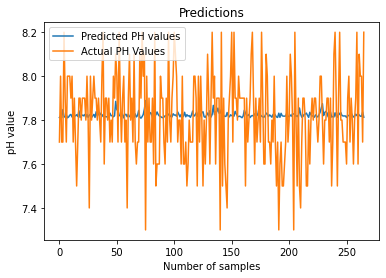

In [17]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted PH values', 'Actual PH Values'], loc='upper left')
plt.xlabel("Number of samples")
plt.ylabel("pH value")
plt.savefig("AnnRegressionForPhUsingPhIndexes.jpg")
plt.show()
